In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(17.00360829396638, 12.94212962438803),
 (-33.1620238524272, 77.76932374748606),
 (69.2186752392387, 26.169797385431934),
 (6.090373321883575, -104.94973145014966),
 (48.231683355338305, 13.259520525973329),
 (-51.32851272724281, -43.271744338331956),
 (20.84095449122077, 68.8450817936851),
 (-55.28413148038824, 96.5448300176912),
 (-3.8597787592775603, 89.09872156948268),
 (62.1567452720858, -36.38723425111516),
 (24.157508238157362, 39.92230108993269),
 (-5.94374701738613, 151.8290724587988),
 (-5.890132212409938, 126.89180090262369),
 (-84.76879443193012, -142.38664105320987),
 (53.365499478725525, 63.07246001922064),
 (-40.93318156373235, -79.04347190113624),
 (-7.001596451132102, -103.91387018660012),
 (-74.29491311045021, -28.12894564257806),
 (60.21229749284791, -11.937732265590597),
 (79.9188102298908, -39.31801096470386),
 (64.88529862017808, -96.98797838792356),
 (-81.55572889746581, -4.911577994396623),
 (77.16136723415386, -92.10377113031694),
 (-68.68417787139158, -48.826

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city cound to confirm sufficient count.
len(cities)

615

In [7]:
# Import the request library
import requests

# import the API key
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
# Import the time library and the datetime modeul from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run and API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("--------------------------")
print("Data Retieval Complete     ")
print("--------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | bilma
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | karasjok
Processing Record 4 of Set 1 | acapulco
Processing Record 5 of Set 1 | oberndorf
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | porbandar
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | meulaboh
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | mecca
Processing Record 12 of Set 1 | kokopo
Processing Record 13 of Set 1 | ambon
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | qostanay
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | sorvag
City not found. Skipping...
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | poum
Processing Record 23

Processing Record 42 of Set 4 | turukhansk
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | xichang
Processing Record 45 of Set 4 | kailua
Processing Record 46 of Set 4 | daru
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | muli
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | palmer
Processing Record 1 of Set 5 | nampula
Processing Record 2 of Set 5 | dillon
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | ust-maya
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | cam ranh
Processing Record 7 of Set 5 | castro
Processing Record 8 of Set 5 | dikson
Processing Record 9 of Set 5 | dubbo
Processing Record 10 of Set 5 | saskylakh
Processing Record 11 of Set 5 | tigil
Processing Record 12 of Set 5 | porto walter
Processing Record 13 of Set 5 | dalhousie
Processing Record 14 of Set 5 | cayenne
Processing Record 15 of Set 5 | neiafu
Processing R

Processing Record 32 of Set 8 | madingou
Processing Record 33 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 8 | gornyy
Processing Record 35 of Set 8 | kirovo-chepetsk
Processing Record 36 of Set 8 | dalby
Processing Record 37 of Set 8 | belomorsk
Processing Record 38 of Set 8 | umba
Processing Record 39 of Set 8 | ishigaki
Processing Record 40 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 8 | yemelyanovo
Processing Record 42 of Set 8 | woodward
Processing Record 43 of Set 8 | carikar
City not found. Skipping...
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | ploemeur
Processing Record 46 of Set 8 | itoman
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | raudeberg
Processing Record 49 of Set 8 | saint-francois
Processing Record 50 of Set 8 | carupano
Processing Record 1 of Set 9 | yar-sale
Processing Record 2 of Set 9 | aklavik
Processing Record 3 of Set 9 | agadez

Processing Record 21 of Set 12 | imbituba
Processing Record 22 of Set 12 | ratnagiri
Processing Record 23 of Set 12 | aksu
Processing Record 24 of Set 12 | bahia blanca
Processing Record 25 of Set 12 | wanning
Processing Record 26 of Set 12 | vichayal
City not found. Skipping...
Processing Record 27 of Set 12 | nushki
Processing Record 28 of Set 12 | dukat
Processing Record 29 of Set 12 | dwarka
Processing Record 30 of Set 12 | abu kamal
Processing Record 31 of Set 12 | copacabana
Processing Record 32 of Set 12 | borogontsy
Processing Record 33 of Set 12 | machinga
Processing Record 34 of Set 12 | capao da canoa
Processing Record 35 of Set 12 | plougastel-daoulas
Processing Record 36 of Set 12 | visby
Processing Record 37 of Set 12 | luoyang
Processing Record 38 of Set 12 | champerico
Processing Record 39 of Set 12 | vostok
Processing Record 40 of Set 12 | plettenberg bay
Processing Record 41 of Set 12 | kayes
Processing Record 42 of Set 12 | kavaratti
Processing Record 43 of Set 12 | 

NameError: name 'ptin' is not defined

In [11]:
#  Convert the array of dictionaires to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilma,18.6853,12.9164,59.68,15,0,19.08,NE,2022-01-30 22:01:28
1,Bambous Virieux,-20.3428,57.7575,79.05,94,75,12.66,MU,2022-01-30 21:56:52
2,Karasjok,69.4719,25.5112,5.11,99,20,2.82,NO,2022-01-30 22:01:28
3,Acapulco,16.8634,-99.8901,83.55,60,0,10.22,MX,2022-01-30 22:01:28
4,Oberndorf,48.2905,8.5722,33.89,100,21,3.85,DE,2022-01-30 22:01:29
5,Mar Del Plata,-38.0023,-57.5575,66.87,86,40,18.01,AR,2022-01-30 21:57:34
6,Porbandar,21.6422,69.6093,66.87,82,0,8.41,IN,2022-01-30 21:57:23
7,Busselton,-33.6500,115.3333,64.09,64,90,18.16,AU,2022-01-30 22:01:29
8,Meulaboh,4.1363,96.1285,76.55,86,86,3.22,ID,2022-01-30 22:01:30
9,Tasiilaq,65.6145,-37.6368,8.76,50,96,12.75,GL,2022-01-30 22:01:30


In [15]:
new_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilma,NE,2022-01-30 22:01:28,18.6853,12.9164,59.68,15,0,19.08
1,Bambous Virieux,MU,2022-01-30 21:56:52,-20.3428,57.7575,79.05,94,75,12.66
2,Karasjok,NO,2022-01-30 22:01:28,69.4719,25.5112,5.11,99,20,2.82
3,Acapulco,MX,2022-01-30 22:01:28,16.8634,-99.8901,83.55,60,0,10.22
4,Oberndorf,DE,2022-01-30 22:01:29,48.2905,8.5722,33.89,100,21,3.85
5,Mar Del Plata,AR,2022-01-30 21:57:34,-38.0023,-57.5575,66.87,86,40,18.01
6,Porbandar,IN,2022-01-30 21:57:23,21.6422,69.6093,66.87,82,0,8.41
7,Busselton,AU,2022-01-30 22:01:29,-33.6500,115.3333,64.09,64,90,18.16
8,Meulaboh,ID,2022-01-30 22:01:30,4.1363,96.1285,76.55,86,86,3.22
9,Tasiilaq,GL,2022-01-30 22:01:30,65.6145,-37.6368,8.76,50,96,12.75


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

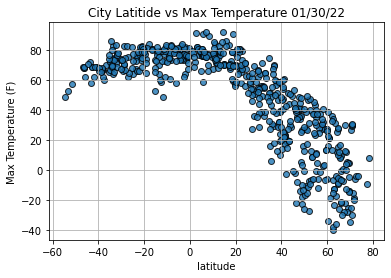

In [24]:
# Import time module
import time

# Build the scatter plots for lattitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

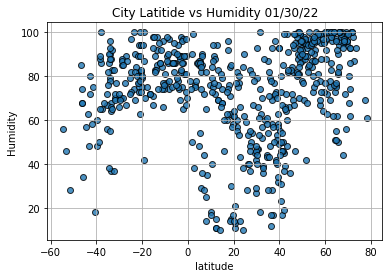

In [22]:
# Build the scatter plots for lattitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

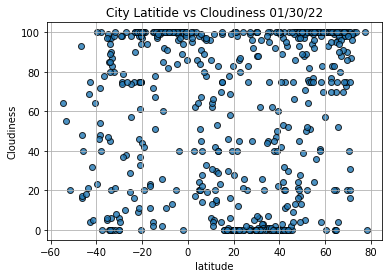

In [25]:
# Build the scatter plots for lattitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

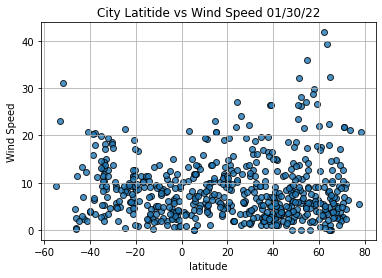

In [26]:
# Build the scatter plots for lattitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths =1, marker="o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitide vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()